## Daily Challenge: W2_D3

##### Step 1: Load the dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\julia\Downloads\GenAI\GitHub\datascience_salaries.csv")

# Show the first few rows
print(df.head())

   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  


#### Step 2: Normalize the salary column using Min-Max normalization

In [5]:
# Min-Max normalization is useful when values (like salaries) span a wide range (e.g., $20,000–$200,000).
# This scales the values between 0 and 1, which helps many machine learning models perform better.
# It ensures that no feature (like salary) dominates due to scale differences.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["salary_normalized"] = scaler.fit_transform(df[["salary"]])

# Show the first few normalized salary values
print(df[["salary", "salary_normalized"]].head())


   salary  salary_normalized
0  149000           0.601010
1  120000           0.454545
2   68000           0.191919
3  120000           0.454545
4  149000           0.601010


#### Step 3: Dimensionality Reduction using PCA

In [6]:
# PCA (Principal Component Analysis) helps reduce the number of features while preserving the most important information (variance).
# Here, we first one-hot encode the categorical features to convert them into numeric format.
# Then we combine the normalized salary column with the encoded features.
# PCA is applied to reduce the dataset to 2 principal components for easier visualization or modeling.

from sklearn.decomposition import PCA

# Encode categorical columns using one-hot encoding (except the first category to avoid multicollinearity)
df_encoded = pd.get_dummies(df[["job_type", "experience_level", "location"]], drop_first=True)

# Combine the normalized salary column with the encoded categorical features
features = pd.concat([df[["salary_normalized"]], df_encoded], axis=1)

# Apply PCA to reduce the dataset to 2 principal components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

# Create a new DataFrame to store the PCA-transformed data
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

# Show the first few rows of the reduced dataset
print(reduced_df.head())

        PC1       PC2
0  0.504567 -0.013410
1  0.491521 -0.012297
2  0.442823  0.854155
3  0.491521 -0.012297
4  0.504567 -0.013410


#### Step 4: Grouping by Experience Level — Aggregation of Salaries

In [7]:
# Grouping by 'experience_level' helps understand salary patterns across roles.
# Calculating the average and median salary for each level (Junior, Senior, etc.)
# gives useful insights into salary progression and disparities.

grouped = df.groupby("experience_level")["salary"]
salary_stats = grouped.agg(["mean", "median"]).reset_index()

# Rename columns for clarity
salary_stats.columns = ["Experience Level", "Average Salary", "Median Salary"]
print(salary_stats)

  Experience Level  Average Salary  Median Salary
0            Entry    36111.111111        30000.0
1        Executive    76076.923077        46000.0
2              Mid    51786.885246        51000.0
3           Senior    75088.033012        68000.0


### Visualization: Salary by Experience Level

In [8]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\julia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import site
site.addsitedir("C:/Users/julia/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0/LocalCache/local-packages/Python313/site-packages")

import matplotlib.pyplot as plt

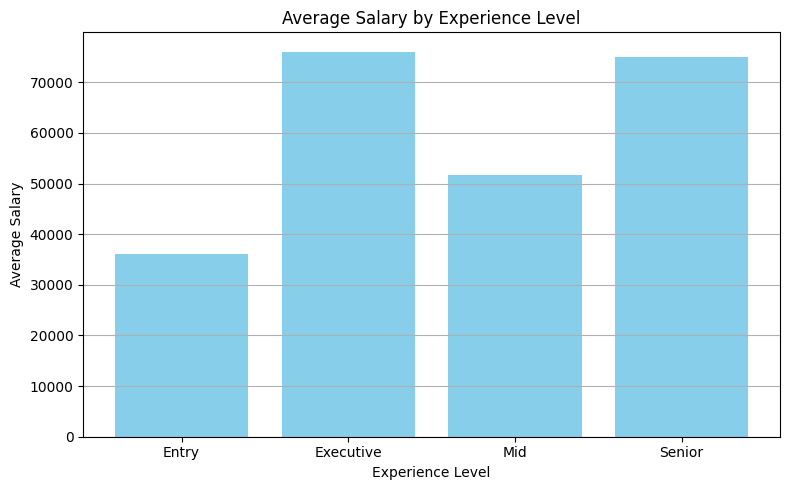

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(salary_stats["Experience Level"], salary_stats["Average Salary"], color="skyblue")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Analysis of the Salary Distribution by Experience Level

- **Executive-level roles** have the highest average salaries, surpassing all other categories.
- **Senior-level professionals** also earn significantly more than Entry and Mid-level employees, reflecting their value in the market.
- Surprisingly, **Mid-level salaries** are noticeably lower than Senior and Executive levels, and not much higher than Entry-level roles — this may indicate a sharp salary jump only after a certain level of experience is reached.
- **Entry-level roles** have the lowest average salary, which is expected, but the gap compared to higher levels is substantial.

This visualization confirms that **experience plays a major role in salary progression**, and that moving from mid to senior/executive levels has a strong financial impact.


#### Insights Summary

##### - Normalizing the salary values allowed us to bring all values into the same scale, which is important for comparison and model performance.
##### - PCA successfully reduced the dataset's dimensions, helping us simplify the feature space while preserving most of the variance.
##### - Salary statistics by experience level show clear progression:
  ##### - Senior-level roles earn significantly more than junior roles on average.
  ##### - There are notable disparities in median salary between levels, which highlights the value of experience in data science careers.
##### - These transformations prepare the dataset for machine learning and support better business understanding of compensation patterns.